In [2]:
import os
import sys
from pathlib import Path
import numpy as np

# Resolve project root without __file__ (works inside notebooks)
cwd = Path.cwd().resolve()
if (cwd / "src").is_dir():
    project_root = cwd
elif (cwd.parent / "src").is_dir():
    project_root = cwd.parent
else:
    # Fallback: assume we are in notebooks/ and project root is one level up
    project_root = cwd.parent

if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.data_preprocessing import preprocess_pipeline, IMAGE_EXTENSIONS

In [4]:
# Paths
from pathlib import Path

# Reuse project_root from previous cell; fallback if missing
try:
    project_root
except NameError:
    cwd = Path.cwd().resolve()
    if (cwd / "src").is_dir():
        project_root = cwd
    elif (cwd.parent / "src").is_dir():
        project_root = cwd.parent
    else:
        project_root = cwd.parent

source_dir = project_root / "data" / "raw" / "breast-cancer-padded-interpolated-720p"
processed_dir = project_root / "data" / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)

if not source_dir.is_dir():
    raise FileNotFoundError(
        f"Expected extracted dataset at {source_dir}. Please download/extract it before running this notebook."
    )

### using preprocess_pipeline Function to crop borders , resize imgs and normlize 

In [34]:
# Process each class subfolder
target_size = (224, 224)

def is_image_file(path: Path) -> bool:
    return path.suffix.lower() in IMAGE_EXTENSIONS

if not source_dir.is_dir():
    raise FileNotFoundError(f"Source directory not found: {source_dir}")

for subfolder in sorted(p for p in source_dir.iterdir() if p.is_dir()):
    processed_subfolder = processed_dir / subfolder.name
    processed_subfolder.mkdir(parents=True, exist_ok=True)

    image_paths = sorted(p for p in subfolder.iterdir() if p.is_file() and is_image_file(p))
    if not image_paths:
        print(f"No images found in {subfolder}; skipping.")
        continue

    # Apply pipeline to these images
    processed_images = preprocess_pipeline([str(p) for p in image_paths], target_size=target_size)

    # Save each processed image as .npy (same ordering as image_paths)
    for img_array, img_path in zip(processed_images, image_paths):
        save_path = processed_subfolder / (img_path.stem + ".npy")
        np.save(save_path, img_array)

    print(f"Processed {len(processed_images)} images in folder {subfolder.name}")

Processed 324 images in folder 0_N
Processed 590 images in folder 1_PB
Processed 590 images in folder 1_PB
Processed 374 images in folder 2_UDH
Processed 374 images in folder 2_UDH
Processed 521 images in folder 3_FEA
Processed 521 images in folder 3_FEA
Processed 367 images in folder 4_ADH
Processed 367 images in folder 4_ADH
Processed 529 images in folder 5_DCIS
Processed 529 images in folder 5_DCIS
Processed 473 images in folder 6_IC
Processed 473 images in folder 6_IC


Visualizing 3 random images from C:\Users\aimen\Desktop\breast-cancer-unsupervised-app\data\raw\breast-cancer-padded-interpolated-720p...


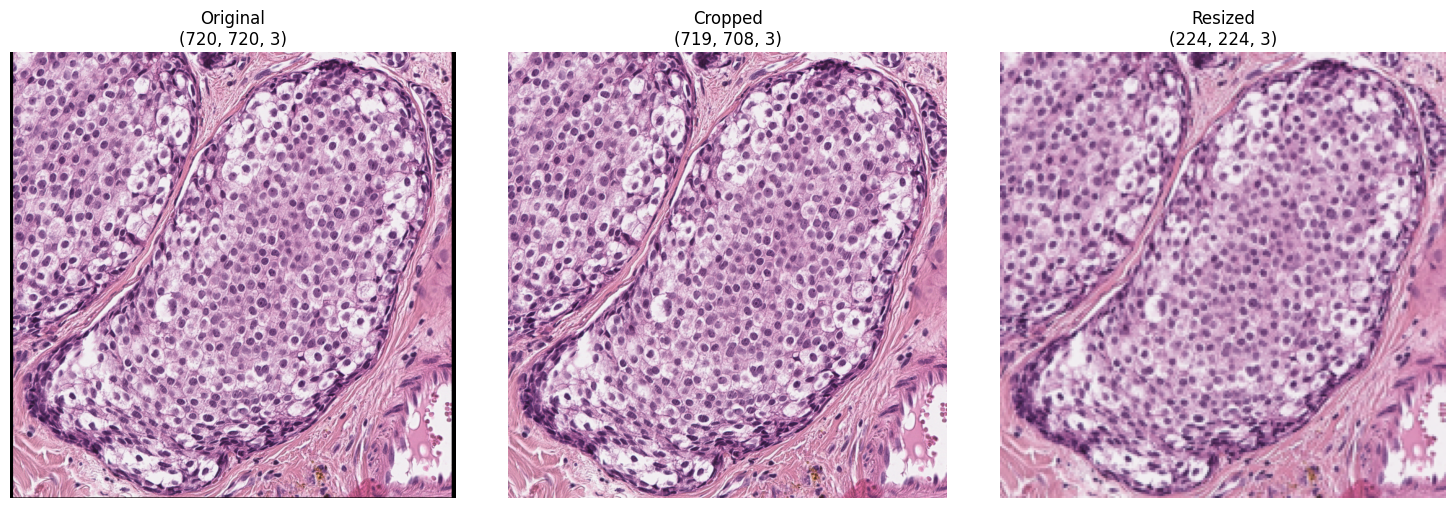

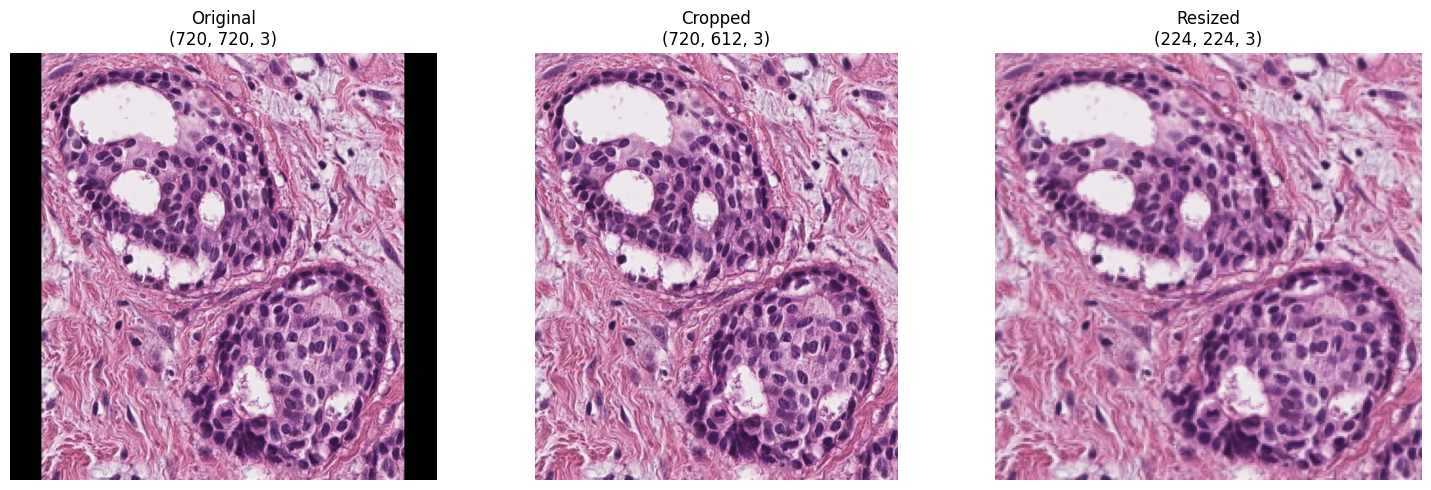

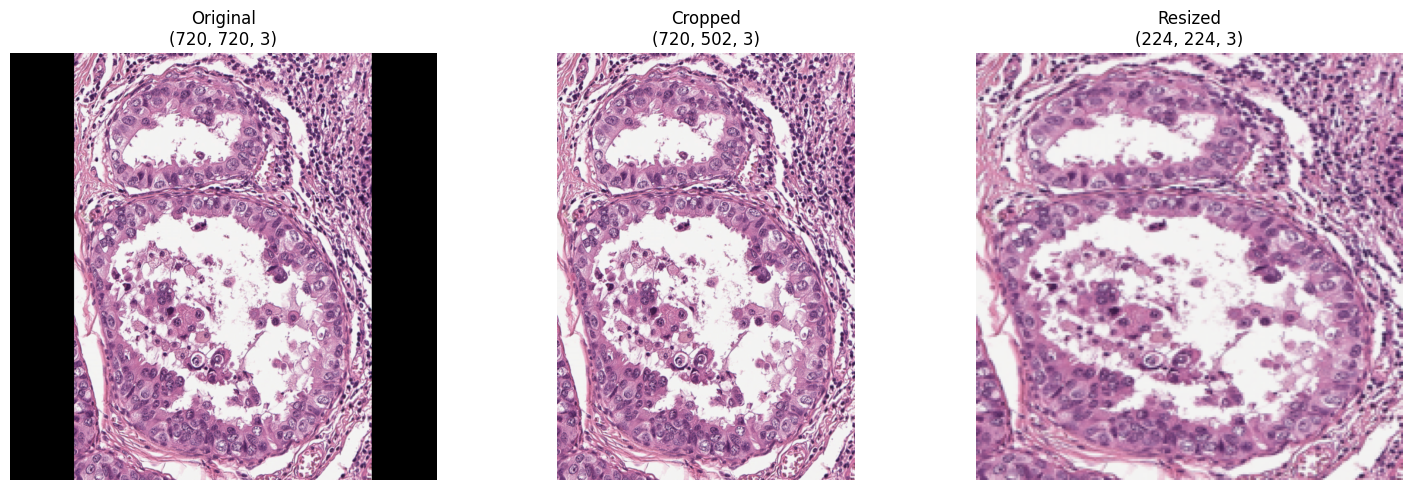

In [5]:
import matplotlib.pyplot as plt
import random
import cv2
import os
from pathlib import Path
from src.data_preprocessing import crop_black, resize_image

# Ensure source_dir is defined


# Collect all image paths
all_image_paths = []
for root, _, files in os.walk(source_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            all_image_paths.append(os.path.join(root, file))

# Select 10 random images
if len(all_image_paths) < 3:
    selected_paths = all_image_paths
else:
    selected_paths = random.sample(all_image_paths, 3)

print(f"Visualizing {len(selected_paths)} random images from {source_dir}...")

if not selected_paths:
    print("No images found! Please check if the dataset is extracted correctly.")
else:
    for img_path in selected_paths:
        # Load Image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Could not read image: {img_path}")
            continue
        
        # 1. Original
        original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # 2. Crop Black
        cropped = crop_black(img)
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        
        # 3. Resize
        resized = resize_image(cropped, size=(224, 224))
        resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        
        # Display
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(original_rgb)
        axes[0].set_title(f"Original\n{original_rgb.shape}")
        axes[0].axis('off')
        
        axes[1].imshow(cropped_rgb)
        axes[1].set_title(f"Cropped\n{cropped_rgb.shape}")
        axes[1].axis('off')
        
        axes[2].imshow(resized_rgb)
        axes[2].set_title(f"Resized\n{resized_rgb.shape}")
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()